# Vector Calculus for AI/ML - Part 3: Taylor Series, Hessian & Advanced Topics

This final notebook covers advanced calculus concepts essential for optimization.

**Key Topics:** Taylor Series, Hessian Matrix, Linear Approximation, Optimization Landscape

In [1]:
"""
Setup: Import Required Libraries
"""
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
from scipy.optimize import minimize
from mpl_toolkits.mplot3d import Axes3D

np.set_printoptions(precision=4, suppress=True)
plt.style.use('seaborn-v0_8-darkgrid')

print("Ready for advanced calculus!")

Ready for advanced calculus!


## 10. Taylor Series

**Approximate any function using derivatives at a point.**

**Formula:**
$$f(x) \approx f(a) + f'(a)(x-a) + \frac{f''(a)}{2!}(x-a)^2 + \frac{f'''(a)}{3!}(x-a)^3 + \cdots$$

**Orders:**
- 0th order: f(a) (constant)
- 1st order: f(a) + f'(a)(x-a) (linear)
- 2nd order: + quadratic term (captures curvature)

**ML Applications:**
- Gradient descent (1st order)
- Newton's method (2nd order)
- Trust region methods
- Local approximations

Taylor Series Approximation


ValueError: x and y must have same first dimension, but have shapes (200,) and (1,)

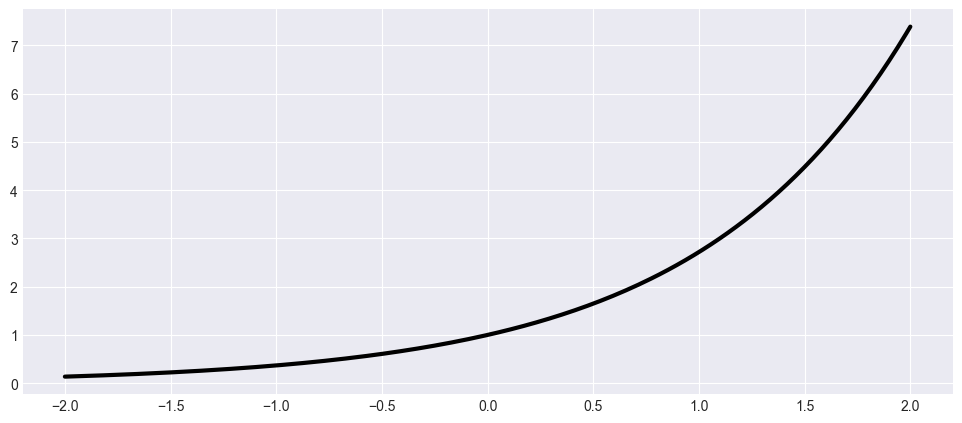

In [2]:
"""
Taylor Series - Function Approximation

Idea: Approximate complex function using polynomials

Expansion around point a:
f(x) = Σ [f^(n)(a) / n!] (x-a)^n

Truncated (practical):
- 1st order: f(x) ≈ f(a) + f'(a)(x-a)
- 2nd order: f(x) ≈ f(a) + f'(a)(x-a) + (1/2)f''(a)(x-a)²
"""

print("="*60)
print("Taylor Series Approximation")
print("="*60)

# Example function: f(x) = e^x
def f(x):
    """Exponential function"""
    return np.exp(x)

# Taylor approximations around a = 0
def taylor_0th(x, a=0):
    """0th order: just constant f(a)"""
    return f(a)

def taylor_1st(x, a=0):
    """1st order: f(a) + f'(a)(x-a)"""
    # For e^x: f'(x) = e^x
    return f(a) + f(a)*(x - a)

def taylor_2nd(x, a=0):
    """2nd order: + (1/2)f''(a)(x-a)²"""
    # For e^x: f''(x) = e^x
    return f(a) + f(a)*(x - a) + 0.5*f(a)*(x - a)**2

def taylor_3rd(x, a=0):
    """3rd order: + (1/6)f'''(a)(x-a)³"""
    return f(a) + f(a)*(x - a) + 0.5*f(a)*(x - a)**2 + (1/6)*f(a)*(x - a)**3

def taylor_5th(x, a=0):
    """5th order Taylor approximation"""
    fa = f(a)
    dx = x - a
    return fa * (1 + dx + dx**2/2 + dx**3/6 + dx**4/24 + dx**5/120)

# Visualize approximations
x_plot = np.linspace(-2, 2, 200)
a_expand = 0  # Expansion point

plt.figure(figsize=(12, 5))

# Plot function and approximations
plt.plot(x_plot, f(x_plot), 'k-', linewidth=3, label='f(x) = e^x (exact)', zorder=10)
plt.plot(x_plot, taylor_0th(x_plot, a_expand), 'b--', linewidth=2, label='0th order (constant)', alpha=0.7)
plt.plot(x_plot, taylor_1st(x_plot, a_expand), 'g--', linewidth=2, label='1st order (linear)', alpha=0.7)
plt.plot(x_plot, taylor_2nd(x_plot, a_expand), 'r--', linewidth=2, label='2nd order (quadratic)', alpha=0.7)
plt.plot(x_plot, taylor_3rd(x_plot, a_expand), 'm--', linewidth=2, label='3rd order (cubic)', alpha=0.7)
plt.plot(x_plot, taylor_5th(x_plot, a_expand), 'c--', linewidth=2, label='5th order', alpha=0.7)

# Mark expansion point
plt.plot(a_expand, f(a_expand), 'ro', markersize=12, label=f'Expansion point a={a_expand}', zorder=15)

plt.xlabel('x', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title('Taylor Series Approximations of e^x around x=0', fontsize=14)
plt.legend(loc='upper left')
plt.grid(True, alpha=0.3)
plt.ylim(-0.5, 7)
plt.axhline(y=0, color='k', linewidth=0.5)
plt.axvline(x=0, color='k', linewidth=0.5)
plt.tight_layout()
plt.show()

# Numerical comparison
print("\nApproximation quality at different points:")
print("-"*70)
print("   x     Exact    0th     1st     2nd     3rd     5th")
print("-"*70)

test_points = [-1.0, -0.5, 0.0, 0.5, 1.0, 1.5]

for x in test_points:
    exact = f(x)
    t0 = taylor_0th(x, a_expand)
    t1 = taylor_1st(x, a_expand)
    t2 = taylor_2nd(x, a_expand)
    t3 = taylor_3rd(x, a_expand)
    t5 = taylor_5th(x, a_expand)
    
    print(f"{x:5.1f}  {exact:7.3f}  {t0:6.3f}  {t1:6.3f}  {t2:6.3f}  {t3:6.3f}  {t5:6.3f}")

print("\n→ Higher order = better approximation")
print("→ But only NEAR the expansion point")
print("→ Further away → approximation breaks down")

# ML Application: Gradient Descent vs Newton's Method
print("\n" + "="*60)
print("ML Application: Taylor Series in Optimization")
print("="*60)

# Define a loss function
def loss(x):
    """Example loss: (x - 3)² + 1"""
    return (x - 3)**2 + 1

def loss_grad(x):
    """Gradient: 2(x - 3)"""
    return 2*(x - 3)

def loss_hess(x):
    """Hessian (2nd derivative): 2"""
    return 2

print("\nLoss function: L(x) = (x - 3)² + 1")
print("Minimum at x = 3")

# Gradient Descent (1st order Taylor)
print("\n1. Gradient Descent (1st order approximation):")
print("-"*60)

x_gd = 0.0  # Starting point
lr = 0.1    # Learning rate
trajectory_gd = [x_gd]

for i in range(10):
    # 1st order update: x_new ≈ x_old - α·∇L
    grad = loss_grad(x_gd)
    x_gd = x_gd - lr * grad
    trajectory_gd.append(x_gd)
    
    if i < 5 or i == 9:
        print(f"Step {i}: x = {x_gd:.4f}, L(x) = {loss(x_gd):.4f}")

# Newton's Method (2nd order Taylor)
print("\n2. Newton's Method (2nd order approximation):")
print("-"*60)

x_newton = 0.0  # Same starting point
trajectory_newton = [x_newton]

for i in range(5):
    # 2nd order update: x_new = x_old - [∇L / ∇²L]
    grad = loss_grad(x_newton)
    hess = loss_hess(x_newton)
    x_newton = x_newton - grad / hess
    trajectory_newton.append(x_newton)
    
    print(f"Step {i}: x = {x_newton:.4f}, L(x) = {loss(x_newton):.4f}")

print("\n→ Gradient descent (1st order): slow, many steps")
print("→ Newton's method (2nd order): fast, fewer steps")
print("→ Trade-off: Newton requires Hessian (expensive!)")

## 11. Hessian Matrix

**Matrix of all second-order partial derivatives.**

**For f: ℝⁿ → ℝ:**
$$H_{ij} = \frac{\partial^2 f}{\partial x_i \partial x_j}$$

**Properties:**
- Symmetric matrix (Hᵀ = H)
- Captures curvature of function
- Eigenvalues determine local shape

**ML Application:**
- Newton's method
- Identifying saddle points
- Second-order optimization
- Understanding loss landscape

In [ ]:
"""
Hessian Matrix - Second Derivatives

For f(x₁, x₂, ..., xₙ), Hessian H is:

H = [∂²f/∂x₁²      ∂²f/∂x₁∂x₂  ...]
    [∂²f/∂x₂∂x₁    ∂²f/∂x₂²    ...]
    [...             ...        ...]

Interpretation:
- Diagonal: curvature along each axis
- Off-diagonal: how axes interact
- Eigenvalues: principal curvatures

Positive definite H → local minimum
Negative definite H → local maximum
Mixed signs → saddle point
"""

print("="*60)
print("Hessian Matrix - Curvature Information")
print("="*60)

# Example: f(x, y) = x² + xy + y²
print("\nExample: f(x, y) = x² + xy + y²")
print("-"*60)

# Using SymPy for symbolic computation
x, y = sp.symbols('x y')
f_sym = x**2 + x*y + y**2

# First derivatives (gradient)
df_dx = sp.diff(f_sym, x)
df_dy = sp.diff(f_sym, y)

# Second derivatives (Hessian)
d2f_dx2 = sp.diff(df_dx, x)
d2f_dxdy = sp.diff(df_dx, y)
d2f_dydx = sp.diff(df_dy, x)
d2f_dy2 = sp.diff(df_dy, y)

print(f"Function: f(x, y) = {f_sym}")
print(f"\nGradient:")
print(f"  ∂f/∂x = {df_dx}")
print(f"  ∂f/∂y = {df_dy}")

print(f"\nHessian matrix:")
print(f"  H = [∂²f/∂x²    ∂²f/∂x∂y]   [{d2f_dx2}  {d2f_dxdy}]")
print(f"      [∂²f/∂y∂x   ∂²f/∂y²  ] = [{d2f_dydx}  {d2f_dy2}]")

# Numerical Hessian
H = np.array([
    [2, 1],
    [1, 2]
])

print(f"\nSymmetric? H = Hᵀ? {np.allclose(H, H.T)} ✓")

# Eigenvalues determine shape
eigenvalues, eigenvectors = np.linalg.eigh(H)

print(f"\nEigenvalues: {eigenvalues}")
print(f"All positive → positive definite → local MINIMUM ✓")

# Different examples
print("\n" + "="*60)
print("Classifying Critical Points via Hessian")
print("="*60)

examples = [
    ("Minimum", "x² + y²", np.array([[2, 0], [0, 2]])),
    ("Maximum", "-x² - y²", np.array([[-2, 0], [0, -2]])),
    ("Saddle", "x² - y²", np.array([[2, 0], [0, -2]])),
]

for name, func, hess in examples:
    eigs = np.linalg.eigvalsh(hess)
    
    print(f"\n{name}: f(x, y) = {func}")
    print(f"  Hessian = {hess.tolist()}")
    print(f"  Eigenvalues: {eigs}")
    
    if np.all(eigs > 0):
        print(f"  → All positive → LOCAL MINIMUM")
    elif np.all(eigs < 0):
        print(f"  → All negative → LOCAL MAXIMUM")
    else:
        print(f"  → Mixed signs → SADDLE POINT")

# ML Application
print("\n" + "="*60)
print("ML Application: Hessian in Neural Networks")
print("="*60)

print("\nWhy Hessian matters in deep learning:")
print("-"*60)

print("\n1. Optimization Landscape:")
print("   - Positive definite → valley (good for optimization)")
print("   - Negative definite → peak (won't converge)")
print("   - Saddle points → common in high dimensions!")

print("\n2. Second-Order Optimization:")
print("   - Newton's method: x_new = x_old - H⁻¹·∇f")
print("   - Uses curvature information")
print("   - Faster convergence than gradient descent")
print("   - But: computing H is O(n²) parameters!")

print("\n3. Practical Approximations:")
print("   - Diagonal approximation (AdaGrad, RMSprop)")
print("   - Low-rank approximation (L-BFGS)")
print("   - Gauss-Newton, Levenberg-Marquardt")

# Demonstrate saddle point problem
print("\n" + "="*60)
print("Demo: Saddle Point Challenge")
print("="*60)

def saddle_function(x, y):
    """Classic saddle: f(x,y) = x² - y²"""
    return x**2 - y**2

# At origin (0, 0):
# - Gradient = [0, 0] (critical point)
# - Hessian = [[2, 0], [0, -2]]
# - Eigenvalues: [2, -2] → SADDLE

print("\nf(x, y) = x² - y²")
print("\nAt origin (0, 0):")
print("  Gradient = [0, 0] ← looks like optimum!")
print("  But Hessian eigenvalues: [2, -2]")
print("  → Positive in x-direction (minimum)")
print("  → Negative in y-direction (maximum)")
print("  → SADDLE POINT (not a minimum!)")

print("\n→ In deep learning: saddle points are COMMON")
print("→ High-dimensional spaces have many saddle points")
print("→ Gradient descent can escape them (unlike local minima)")
print("→ Hessian helps identify and understand them")

## 12. Linear Approximation Using Gradient

**First-order Taylor approximation:**

$$f(x) \approx f(x_0) + \nabla f(x_0) \cdot (x - x_0)$$

**Interpretation:**
- Tangent plane at x₀
- Linear approximation valid LOCALLY
- Basis for gradient descent

**ML Application:**
- Gradient descent step
- Loss prediction after parameter update
- Learning rate selection

In [ ]:
"""
Linear Approximation - Gradient-Based Prediction

Formula:
f(x) ≈ f(x₀) + ∇f(x₀)·(x - x₀)

This is:
- 1st order Taylor expansion
- Tangent plane approximation
- Foundation of gradient descent

Accuracy:
- Good near x₀
- Gets worse further away
- Ignores curvature
"""

print("="*60)
print("Linear Approximation via Gradient")
print("="*60)

# Example function
def f(x, y):
    """f(x, y) = x² + 2y² - xy"""
    return x**2 + 2*y**2 - x*y

def gradient_f(x, y):
    """∇f = [2x - y, 4y - x]"""
    return np.array([2*x - y, 4*y - x])

# Point of expansion
x0 = np.array([1.0, 0.5])
f0 = f(x0[0], x0[1])
grad0 = gradient_f(x0[0], x0[1])

print(f"\nFunction: f(x, y) = x² + 2y² - xy")
print(f"\nExpansion point: x₀ = {x0}")
print(f"  f(x₀) = {f0:.4f}")
print(f"  ∇f(x₀) = {grad0}")

# Linear approximation
def linear_approx(x, y, x0, f0, grad0):
    """
    Linear approximation:
    f(x) ≈ f(x₀) + ∇f(x₀)·(x - x₀)
    """
    x_vec = np.array([x, y])
    dx = x_vec - x0
    return f0 + np.dot(grad0, dx)

# Test points at varying distances
test_points = [
    (1.0, 0.5),   # Same point
    (1.1, 0.6),   # Close
    (1.5, 1.0),   # Medium
    (2.0, 1.5),   # Far
]

print("\n" + "-"*70)
print("Approximation Quality vs Distance")
print("-"*70)
print("  Point         Distance   Exact      Approx     Error")
print("-"*70)

for x, y in test_points:
    exact = f(x, y)
    approx = linear_approx(x, y, x0, f0, grad0)
    distance = np.linalg.norm([x - x0[0], y - x0[1]])
    error = abs(exact - approx)
    
    print(f"({x:4.1f}, {y:4.1f})    {distance:8.3f}   {exact:8.3f}   {approx:8.3f}   {error:7.4f}")

print("\n→ Closer to expansion point → better approximation")
print("→ Further away → linear model breaks down")

# Gradient Descent Application
print("\n" + "="*60)
print("ML Application: Gradient Descent Step")
print("="*60)

print("\nGradient descent update:")
print("  x_new = x_old - α·∇f(x_old)")
print("\nThis comes from linear approximation!")

# Current parameters
theta_old = np.array([2.0, 1.5])
loss_old = f(theta_old[0], theta_old[1])
grad = gradient_f(theta_old[0], theta_old[1])

print(f"\nCurrent: θ = {theta_old}, Loss = {loss_old:.4f}")
print(f"Gradient: ∇Loss = {grad}")

# Try different learning rates
learning_rates = [0.01, 0.05, 0.1, 0.2, 0.5]

print("\n" + "-"*70)
print("Testing different learning rates:")
print("-"*70)
print("  α      θ_new         Loss(actual)  Loss(predicted)  Error")
print("-"*70)

for alpha in learning_rates:
    # Gradient descent step
    theta_new = theta_old - alpha * grad
    
    # Actual loss
    loss_actual = f(theta_new[0], theta_new[1])
    
    # Predicted loss (linear approximation)
    # L(θ_new) ≈ L(θ_old) + ∇L·(θ_new - θ_old)
    #          = L(θ_old) + ∇L·(-α∇L)
    #          = L(θ_old) - α||∇L||²
    loss_predicted = loss_old - alpha * np.dot(grad, grad)
    
    error = abs(loss_actual - loss_predicted)
    
    print(f"{alpha:5.2f}  [{theta_new[0]:5.2f}, {theta_new[1]:5.2f}]  "
          f"{loss_actual:11.4f}  {loss_predicted:14.4f}  {error:8.4f}")

print("\n→ Small α: prediction accurate (staying in linear region)")
print("→ Large α: prediction breaks down (leaving linear region)")
print("→ This is why learning rate tuning matters!")

# Summary
print("\n" + "="*60)
print("Key Insights")
print("="*60)

print("\n1. Linear approximation is LOCAL")
print("   - Valid only near expansion point")
print("   - Breaks down further away")

print("\n2. Gradient descent assumes linearity")
print("   - Each step uses linear approximation")
print("   - Learning rate controls step size")
print("   - Too large → leave linear region → unstable")

print("\n3. Curvature matters")
print("   - Linear approximation ignores curvature")
print("   - Second-order methods (Newton) use Hessian")
print("   - Better approximation but more expensive")

## 13. Complete Summary & Common Mistakes

A comprehensive review of all vector calculus concepts for ML.

In [3]:
"""
Complete Vector Calculus Summary for ML
"""

print("="*70)
print("VECTOR CALCULUS FOR ML - COMPLETE SUMMARY")
print("="*70)

summary_table = {
    "Concept": [
        "Difference Quotient",
        "Derivative",
        "Partial Derivative",
        "Gradient",
        "Jacobian",
        "Hessian",
        "Sum Rule",
        "Product Rule",
        "Chain Rule",
        "Taylor Series",
        "Linear Approximation"
    ],
    "Formula": [
        "[f(x+h) - f(x)] / h",
        "lim(h→0) [f(x+h)-f(x)]/h",
        "∂f/∂xᵢ (others constant)",
        "∇f = [∂f/∂x₁, ..., ∂f/∂xₙ]ᵀ",
        "Jᵢⱼ = ∂fᵢ/∂xⱼ",
        "Hᵢⱼ = ∂²f/∂xᵢ∂xⱼ",
        "(f+g)' = f' + g'",
        "(fg)' = f'g + fg'",
        "(f∘g)' = f'(g)·g'",
        "f(x) ≈ Σ f⁽ⁿ⁾(a)(x-a)ⁿ/n!",
        "f(x) ≈ f(x₀) + ∇f(x₀)·(x-x₀)"
    ],
    "ML Use": [
        "Numerical gradients",
        "Parameter sensitivity",
        "Per-parameter gradients",
        "Gradient descent direction",
        "Transformations",
        "Curvature, Newton's method",
        "Multi-term losses",
        "Weighted combinations",
        "BACKPROPAGATION",
        "Local approximations",
        "GD step prediction"
    ]
}

print("\nKey Concepts:")
print("-"*70)
for i in range(len(summary_table["Concept"])):
    print(f"\n{i+1}. {summary_table['Concept'][i]}")
    print(f"   Formula: {summary_table['Formula'][i]}")
    print(f"   ML Use:  {summary_table['ML Use'][i]}")

# Common Mistakes
print("\n" + "="*70)
print("⚠️  COMMON MISTAKES TO AVOID")
print("="*70)

mistakes = [
    (
        "1. Confusing gradient and Jacobian",
        "   ✗ Using gradient for vector outputs",
        "   ✓ Gradient: scalar output | Jacobian: vector output"
    ),
    (
        "2. Forgetting transpose in gradients",
        "   ✗ Treating gradient as row vector",
        "   ✓ Gradient is COLUMN vector: ∇f = [∂f/∂x₁, ...]ᵀ"
    ),
    (
        "3. Ignoring higher-order terms",
        "   ✗ Assuming linear approximation is always accurate",
        "   ✓ Linear approx only valid LOCALLY (small steps)"
    ),
    (
        "4. Not checking convexity",
        "   ✗ Assuming gradient descent finds global minimum",
        "   ✓ Non-convex → local minima, saddle points possible"
    ),
    (
        "5. Wrong chain rule application",
        "   ✗ Forgetting intermediate derivatives",
        "   ✓ Chain ALL derivatives: df/dx = df/du · du/dx"
    ),
    (
        "6. Numerical instability",
        "   ✗ h too small in difference quotient → precision errors",
        "   ✓ Use h ≈ 1e-8, or automatic differentiation"
    )
]

for wrong, bad, good in mistakes:
    print(f"\n{wrong}")
    print(bad)
    print(good)

print("\n" + "="*70)
print("🎉 CONGRATULATIONS!")
print("="*70)
print("\nYou now understand:")
print("  ✓ How derivatives enable learning")
print("  ✓ Why gradients point uphill (and -∇f downhill)")
print("  ✓ How backpropagation works (chain rule!)")
print("  ✓ The math behind gradient descent")
print("  ✓ Why curvature matters (Hessian)")
print("  ✓ How to approximate functions (Taylor series)")
print("\nYou're ready to:")
print("  → Implement gradient descent from scratch")
print("  → Understand neural network training")
print("  → Debug optimization issues")
print("  → Read ML research papers")
print("\n" + "="*70)

VECTOR CALCULUS FOR ML - COMPLETE SUMMARY

Key Concepts:
----------------------------------------------------------------------

1. Difference Quotient
   Formula: [f(x+h) - f(x)] / h
   ML Use:  Numerical gradients

2. Derivative
   Formula: lim(h→0) [f(x+h)-f(x)]/h
   ML Use:  Parameter sensitivity

3. Partial Derivative
   Formula: ∂f/∂xᵢ (others constant)
   ML Use:  Per-parameter gradients

4. Gradient
   Formula: ∇f = [∂f/∂x₁, ..., ∂f/∂xₙ]ᵀ
   ML Use:  Gradient descent direction

5. Jacobian
   Formula: Jᵢⱼ = ∂fᵢ/∂xⱼ
   ML Use:  Transformations

6. Hessian
   Formula: Hᵢⱼ = ∂²f/∂xᵢ∂xⱼ
   ML Use:  Curvature, Newton's method

7. Sum Rule
   Formula: (f+g)' = f' + g'
   ML Use:  Multi-term losses

8. Product Rule
   Formula: (fg)' = f'g + fg'
   ML Use:  Weighted combinations

9. Chain Rule
   Formula: (f∘g)' = f'(g)·g'
   ML Use:  BACKPROPAGATION

10. Taylor Series
   Formula: f(x) ≈ Σ f⁽ⁿ⁾(a)(x-a)ⁿ/n!
   ML Use:  Local approximations

11. Linear Approximation
   Formula: f(x) ≈ f(